In [3]:
# 1. Import Libraries
import pandas as pd
import matplotlib.pyplot as plt
from dataclasses import dataclass
from io import StringIO

# 2. Define Data Classes
@dataclass
class PopulationTrend:
    year: int
    index: float
    lower_ci: float
    upper_ci: float

    def yerr_lower(self) -> float:
        """Calculate the lower error margin."""
        return self.index - self.lower_ci

    def yerr_upper(self) -> float:
        """Calculate the upper error margin."""
        return self.upper_ci - self.index

@dataclass
class EnvironmentalFactor:
    year: int
    average_temperature: float  # in Celsius
    precipitation: float        # in millimeters
    habitat_quality_index: float

# 3. Load Sample Data
# Sample data for 430444_2021.csv
population_csv = """
Year,Index,Lower CI,Upper CI
1970,24.13,14.77,57.90
1971,25.00,15.93,56.37
1972,30.07,20.18,61.89
1973,32.66,20.20,67.55
1974,40.46,27.10,72.22
1975,33.14,22.25,64.82
1976,23.34,15.66,47.35
1977,21.43,14.10,42.94
1978,21.55,14.12,42.52
1979,23.79,16.33,43.59
1980,20.13,13.59,40.05
1981,21.83,15.38,39.65
1982,19.55,13.39,38.39
1983,19.95,13.87,36.77
1984,16.96,11.68,33.72
1985,22.03,15.85,38.60
1986,14.96,10.12,29.14
1987,24.87,17.86,43.32
1988,28.54,20.18,54.98
1989,16.06,10.79,31.51
1990,14.72,9.88,27.13
1991,15.58,10.63,31.21
1992,21.98,15.68,40.47
1993,18.59,13.25,34.53
1994,22.38,15.96,40.38
1995,14.97,10.46,26.01
1996,13.49,9.28,24.27
1997,23.07,16.60,38.73
1998,16.54,11.55,29.09
1999,11.78,7.86,21.55
2000,11.18,7.47,21.41
2001,14.22,9.99,25.19
2002,17.17,12.43,31.16
2003,13.44,9.47,22.79
2004,9.35,6.28,18.07
2005,11.81,8.26,21.46
2006,16.56,12.13,26.67
2007,12.02,8.61,19.49
2008,9.60,6.58,17.23
2009,14.85,10.96,23.77
2010,10.36,7.28,18.02
2011,7.79,5.29,14.89
2012,21.55,15.65,33.71
2013,19.00,13.66,30.15
2014,20.46,15.63,33.80
2015,20.75,16.19,30.84
2016,16.48,12.18,25.95
2017,9.42,6.67,16.45
2018,19.56,14.91,28.17
2019,13.47,10.12,20.64
2020,12.60,9.24,19.62
2021,9.50,6.87,16.48
"""

# Sample data for environmental_factors.csv
environmental_csv = """
Year,Average Temperature,Precipitation,Habitat Quality Index
1970,5.2,800,75
1971,5.5,820,78
1972,6.0,790,80
1973,5.8,810,77
1974,6.2,830,79
1975,5.9,805,76
1976,5.1,790,74
1977,4.8,780,73
1978,5.0,800,75
1979,5.3,815,77
1980,5.4,805,76
1981,5.6,820,78
1982,5.2,800,75
1983,5.7,830,79
1984,5.1,790,74
1985,5.8,810,77
1986,5.0,800,75
1987,5.5,820,78
1988,5.9,830,79
1989,5.3,815,77
1990,5.4,805,76
1991,5.6,820,78
1992,5.2,800,75
1993,5.7,830,79
1994,5.8,810,77
1995,5.3,815,77
1996,5.1,790,74
1997,5.5,820,78
1998,5.2,800,75
1999,5.0,780,73
2000,4.8,770,72
2001,5.1,785,73
2002,5.3,800,75
2003,5.4,810,76
2004,5.0,780,73
2005,5.2,800,75
2006,5.5,820,78
2007,5.1,790,74
2008,5.0,780,73
2009,5.3,805,76
2010,5.4,810,76
2011,5.1,790,74
2012,5.5,820,78
2013,5.2,800,75
2014,5.3,810,76
2015,5.4,805,76
2016,5.0,780,73
2017,5.2,800,75
2018,5.5,820,78
2019,5.1,790,74
2020,5.0,780,73
2021,5.3,805,76
"""

In [4]:
# Read the Population Trends CSV into a pandas DataFrame
population_data = pd.read_csv(StringIO(population_csv))

# Display the first few rows
population_data.head()

,Year,Index,Lower CI,Upper CI
0,1970,24.13,14.77,57.90
1,1971,25.00,15.93,56.37
2,1972,30.07,20.18,61.89
3,1973,32.66,20.20,67.55
4,1974,40.46,27.10,72.22


In [5]:
# Read the Environmental Factors CSV into a pandas DataFrame
environmental_data = pd.read_csv(StringIO(environmental_csv))

# Display the first few rows
environmental_data.head()

,Year,Average Temperature,Precipitation,Habitat Quality Index
0,1970,5.2,800,75
1,1971,5.5,820,78
2,1972,6.0,790,80
3,1973,5.8,810,77
4,1974,6.2,830,79


In [6]:
def parse_population_trends(df: pd.DataFrame) -> list:
    """
    Parses the population trends DataFrame into a list of PopulationTrend objects.
    
    Args:
        df (pd.DataFrame): DataFrame containing population trend data.
        
    Returns:
        list: List of PopulationTrend objects.
    """
    trends = []
    required_columns = {'Year', 'Index', 'Lower CI', 'Upper CI'}
    if not required_columns.issubset(df.columns):
        print(f"Missing required columns in Population Trends data. Found columns: {df.columns}")
        return trends

    for _, row in df.iterrows():
        try:
            trend = PopulationTrend(
                year=int(row['Year']),
                index=float(row['Index']),
                lower_ci=float(row['Lower CI']),
                upper_ci=float(row['Upper CI'])
            )
            trends.append(trend)
        except ValueError as ve:
            print(f"Value error while parsing PopulationTrend: {ve}")
            continue  # Skip rows with invalid data
    return trends

# Parse the population trends
population_trends = parse_population_trends(population_data)

# Display the first few PopulationTrend objects
population_trends[:5]

[PopulationTrend(year=1970, index=24.13, lower_ci=14.77, upper_ci=57.9),
 PopulationTrend(year=1971, index=25.0, lower_ci=15.93, upper_ci=56.37),
 PopulationTrend(year=1972, index=30.07, lower_ci=20.18, upper_ci=61.89),
 PopulationTrend(year=1973, index=32.66, lower_ci=20.2, upper_ci=67.55),
 PopulationTrend(year=1974, index=40.46, lower_ci=27.1, upper_ci=72.22)]

In [7]:
def parse_environmental_factors(df: pd.DataFrame) -> list:
    """
    Parses the environmental factors DataFrame into a list of EnvironmentalFactor objects.
    
    Args:
        df (pd.DataFrame): DataFrame containing environmental factors data.
        
    Returns:
        list: List of EnvironmentalFactor objects.
    """
    factors = []
    required_columns = {'Year', 'Average Temperature', 'Precipitation', 'Habitat Quality Index'}
    if not required_columns.issubset(df.columns):
        print(f"Missing required columns in Environmental Factors data. Found columns: {df.columns}")
        return factors

    for _, row in df.iterrows():
        try:
            factor = EnvironmentalFactor(
                year=int(row['Year']),
                average_temperature=float(row['Average Temperature']),
                precipitation=float(row['Precipitation']),
                habitat_quality_index=float(row['Habitat Quality Index'])
            )
            factors.append(factor)
        except ValueError as ve:
            print(f"Value error while parsing EnvironmentalFactor: {ve}")
            continue  # Skip rows with invalid data
    return factors

# Parse the environmental factors
environmental_factors = parse_environmental_factors(environmental_data)

# Display the first few EnvironmentalFactor objects
environmental_factors[:5]

[EnvironmentalFactor(year=1970, average_temperature=5.2, precipitation=800.0, habitat_quality_index=75.0),
 EnvironmentalFactor(year=1971, average_temperature=5.5, precipitation=820.0, habitat_quality_index=78.0),
 EnvironmentalFactor(year=1972, average_temperature=6.0, precipitation=790.0, habitat_quality_index=80.0),
 EnvironmentalFactor(year=1973, average_temperature=5.8, precipitation=810.0, habitat_quality_index=77.0),
 EnvironmentalFactor(year=1974, average_temperature=6.2, precipitation=830.0, habitat_quality_index=79.0)]

In [8]:
def analyze_trends(population_trends: list, environmental_factors: list) -> dict:
    """
    Analyzes the relationship between population indices and environmental factors.
    
    Args:
        population_trends (list): List of PopulationTrend objects.
        environmental_factors (list): List of EnvironmentalFactor objects.
        
    Returns:
        dict: Analysis results including correlation coefficients.
    """
    # Create dictionaries for quick lookup
    population_dict = {trend.year: trend.index for trend in population_trends}
    temp_dict = {factor.year: factor.average_temperature for factor in environmental_factors}
    precip_dict = {factor.year: factor.precipitation for factor in environmental_factors}
    habitat_dict = {factor.year: factor.habitat_quality_index for factor in environmental_factors}

    # Find common years
    common_years = set(population_dict.keys()) & set(temp_dict.keys()) & set(precip_dict.keys()) & set(habitat_dict.keys())
    if not common_years:
        print("No common years found between datasets.")
        return {}

    # Sort the years
    sorted_years = sorted(common_years)

    # Prepare data for analysis
    indices = [population_dict[year] for year in sorted_years]
    temperatures = [temp_dict[year] for year in sorted_years]
    precipitations = [precip_dict[year] for year in sorted_years]
    habitat_qualities = [habitat_dict[year] for year in sorted_years]

    # Perform correlation analysis
    df_analysis = pd.DataFrame({
        'Index': indices,
        'Temperature': temperatures,
        'Precipitation': precipitations,
        'HabitatQuality': habitat_qualities
    })

    correlation_matrix = df_analysis.corr()
    print("\nCorrelation Matrix:")
    display(correlation_matrix)

    return correlation_matrix.to_dict()

# Perform the analysis
analysis_results = analyze_trends(population_trends, environmental_factors)


Correlation Matrix:


,Index,Temperature,Precipitation,HabitatQuality
Index,1.000000,0.702270,0.478196,0.580247
Temperature,0.702270,1.000000,0.751956,0.870534
Precipitation,0.478196,0.751956,1.000000,0.901289
HabitatQuality,0.580247,0.870534,0.901289,1.000000


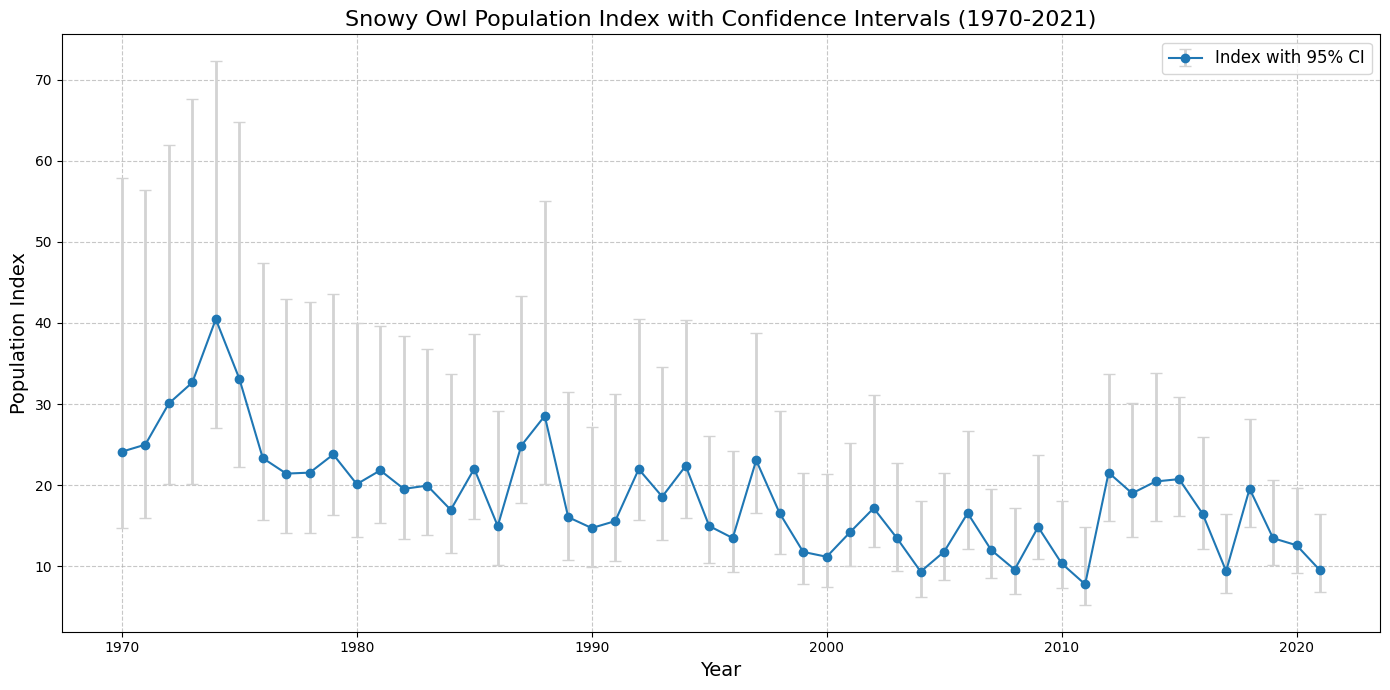

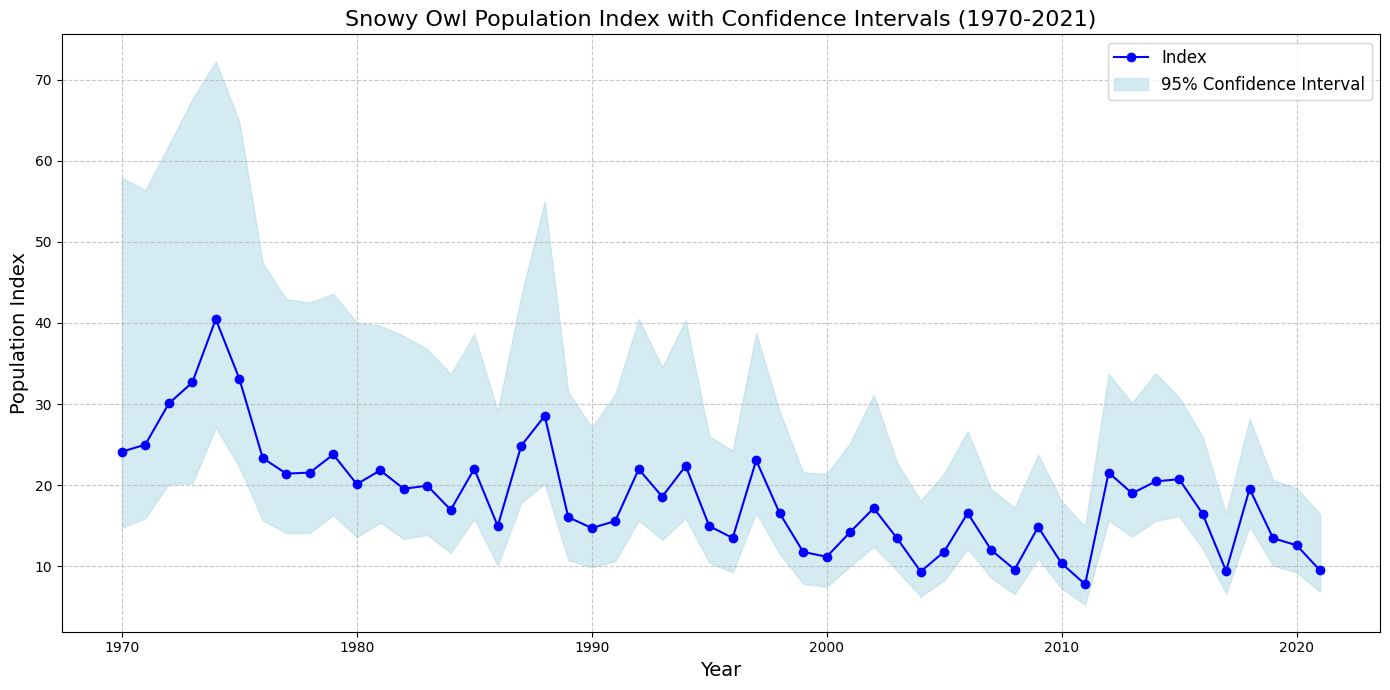

In [9]:
def plot_population_trends(population_trends: list):
    """
    Plots the population index with confidence intervals.
    
    Args:
        population_trends (list): List of PopulationTrend objects.
    """
    if not population_trends:
        print("No population trend data to plot.")
        return

    # Sort trends by year
    sorted_trends = sorted(population_trends, key=lambda x: x.year)
    years = [trend.year for trend in sorted_trends]
    indices = [trend.index for trend in sorted_trends]
    lower_ci = [trend.lower_ci for trend in sorted_trends]
    upper_ci = [trend.upper_ci for trend in sorted_trends]

    # Calculate error margins
    yerr_lower = [trend.yerr_lower() for trend in sorted_trends]
    yerr_upper = [trend.yerr_upper() for trend in sorted_trends]

    # Plot with Error Bars
    plt.figure(figsize=(14, 7))
    plt.errorbar(years, indices, yerr=[yerr_lower, yerr_upper], fmt='-o',
                 ecolor='lightgray', elinewidth=2, capsize=4, label='Index with 95% CI')

    plt.title('Snowy Owl Population Index with Confidence Intervals (1970-2021)', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Population Index', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

    # Alternatively, using fill_between to shade the confidence interval
    plt.figure(figsize=(14, 7))
    plt.plot(years, indices, 'o-', color='blue', label='Index')
    plt.fill_between(years, lower_ci, upper_ci, color='lightblue', alpha=0.5, label='95% Confidence Interval')

    plt.title('Snowy Owl Population Index with Confidence Intervals (1970-2021)', fontsize=16)
    plt.xlabel('Year', fontsize=14)
    plt.ylabel('Population Index', fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.legend(fontsize=12)
    plt.tight_layout()
    plt.show()

# Plot the population trends
plot_population_trends(population_trends)

In [10]:
import requests

def fetch_csv_from_url(url: str) -> pd.DataFrame:
    """
    Fetches a CSV file from the given URL and returns a pandas DataFrame.
    
    Args:
        url (str): The URL to the CSV file.
        
    Returns:
        pd.DataFrame: DataFrame containing CSV data.
    """
    try:
        response = requests.get(url)
        response.raise_for_status()
        csv_data = StringIO(response.text)
        df = pd.read_csv(csv_data)
        print(f"Successfully fetched data from {url}")
        return df
    except requests.exceptions.RequestException as e:
        print(f"Error fetching data from {url}: {e}")
        return pd.DataFrame()  # Return empty DataFrame on error

# Example URLs (replace with your actual URLs)
population_trends_url = 'https://raw.githubusercontent.com/yourusername/yourrepo/main/data/430444_2021.csv'
environmental_factors_url = 'https://raw.githubusercontent.com/yourusername/yourrepo/main/data/environmental_factors.csv'

# Fetch the data
population_data = fetch_csv_from_url(population_trends_url)
environmental_data = fetch_csv_from_url(environmental_factors_url)

Error fetching data from https://raw.githubusercontent.com/yourusername/yourrepo/main/data/430444_2021.csv: 404 Client Error: Not Found for url: https://raw.githubusercontent.com/yourusername/yourrepo/main/data/430444_2021.csv
Error fetching data from https://raw.githubusercontent.com/yourusername/yourrepo/main/data/environmental_factors.csv: 404 Client Error: Not Found for url: https://raw.githubusercontent.com/yourusername/yourrepo/main/data/environmental_factors.csv
